In [47]:
import numpy as np
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

In [48]:
SAMPLE_NUMBER = 1
image_dir = Path.cwd()/"samples"/str(SAMPLE_NUMBER)
COORDS = np.load(image_dir/'points.npy')
IMAGES = [x for x in image_dir.iterdir() if x.suffix == ".jpg"]

In [49]:
def solver(COORDS):
    '''
    COORDS : Nx2x2 array of coordinates
    x', y' = COORDS[i][0]
    x, y = COORDS[i][1]
    '''
    n, _, _ = COORDS.shape
    A = []
    B = []
    for i in range(n):
        x_, y_ = COORDS[i][0]
        x, y = COORDS[i][1]
        
        a = np.array([
            [x,y,1,0,0,0,-x*x_,-y*x_],
            [0,0,0,x,y,1,-x*y_,-y*y_]
        ])
        b = np.array([x_, y_])
        A.append(a)
        B.append(b)

    A = np.vstack(A)
    B = np.hstack(B)
    
    H = np.linalg.lstsq(A, B, rcond=None)[0]
    H = np.append(H, 1)
    H.resize((3,3))
    return H

In [73]:
H = solver(COORDS)


# image 1
image1= cv2.imread(str(IMAGES[0]))
resized_img1 = np.zeros((4000, 6000, 3), dtype=np.uint8)
resized_img1[:image1.shape[0], :image1.shape[1], :] = image1
image1 = cv2.cvtColor(resized_img1, cv2.COLOR_BGR2RGB)
mask1 = np.any(image1 != [0, 0, 0], axis=2)
print(mask1.shape)
# image 2 warped
image = cv2.imread(str(IMAGES[1]))
output_size = (6000, 4000)
output = cv2.warpPerspective(image, H, output_size)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
mask2 = np.any(output != [0, 0, 0], axis=2)
print(mask2.shape)
# final image
final = np.zeros_like(output)
AND_MASK = np.logical_and(mask1, mask2)
final[AND_MASK] = cv2.addWeighted(image1, 0.5, output, 0.5, 0)[AND_MASK]
mask1_alone = np.logical_and(mask1, np.logical_not(mask2))
mask2_alone = np.logical_and(mask2, np.logical_not(mask1))
final[mask1_alone] = image1[mask1_alone]
final[mask2_alone] = output[mask2_alone]

(4000, 6000)
(4000, 6000)


True

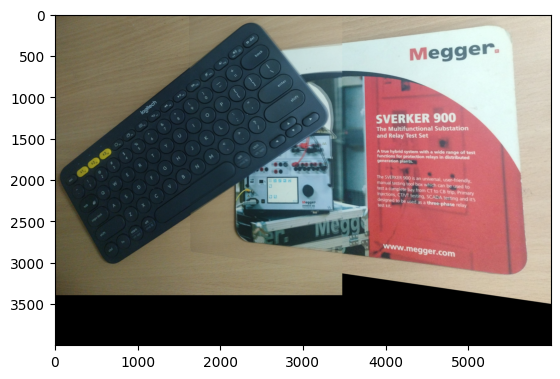

In [76]:
# output = cv2.addWeighted(output, 0.5, im1, 0.5, 0)
plt.imshow(final)
# save image
cv2.imwrite("output.jpg", cv2.cvtColor(final, cv2.COLOR_RGB2BGR))

In [ ]:
plt.savefig('output.png')

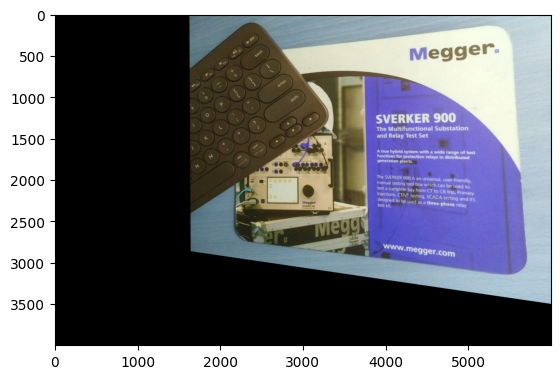

In [34]:
plt.imshow(output)

In [15]:
# H = solver(COORDS)
# image = cv2.imread(str(IMAGES[1]))
# output_size = (5000, 5000)
# output = cv2.warpPerspective(image, H, output_size)

# img1 = cv2.imread(str(IMAGES[0]))
# # overlay = cv2.addWeighted(img1, 0.5, output, 0.5, 0)


# fig, ax = plt.subplots(1,3)
# ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# ax[1].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
# plt.show()
